In [1]:
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.cluster import KMeans
from IPython.display import display, Markdown
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score
import seaborn

<h1>1. Сформировать искусственные наборы данных в двумерном пространстве c характерными
особенностями</h1>

<h3>Blobs</h3>

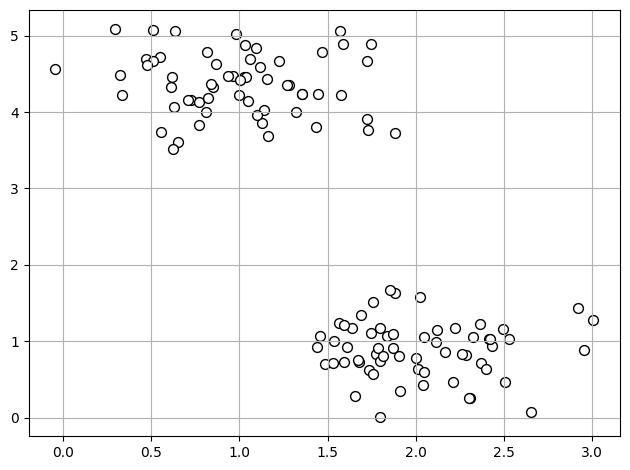

In [2]:
X_blobs, Y_blobs = make_blobs(n_samples=120, n_features=2, centers=2, cluster_std=0.4, shuffle=True, random_state=0)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50,
                    c='white', marker='o', edgecolors='black')
plt.grid()
plt.tight_layout()
plt.show()

<h3>Circles</h3>

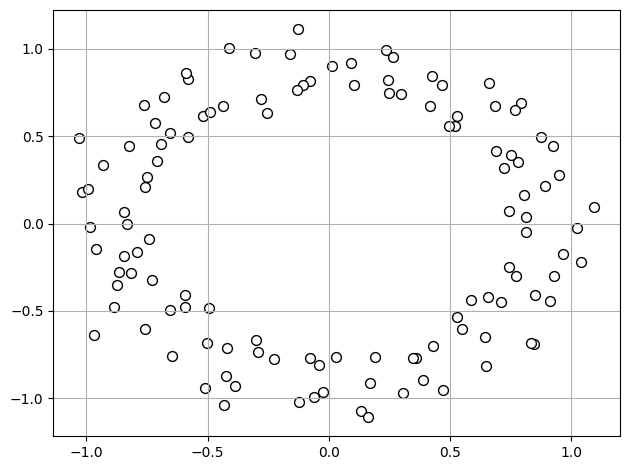

In [3]:
X_circles, Y_circles = make_circles(n_samples=120, shuffle=True, noise=0.05, random_state=0)
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=50,
                    c='white', marker='o', edgecolors='black')
plt.grid()
plt.tight_layout()
plt.show()

<h3>Lines</h3>

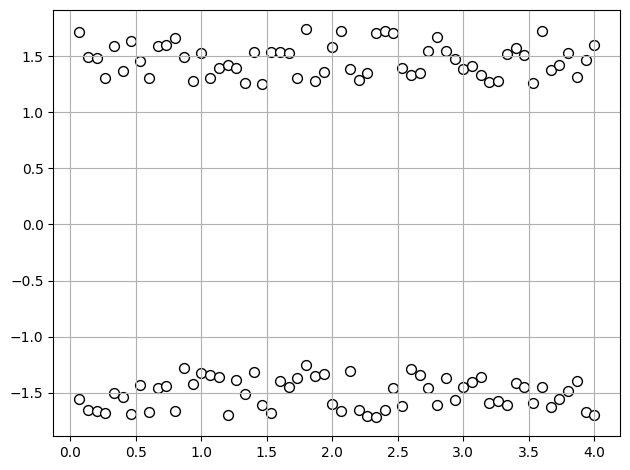

In [4]:
X_lines = []
line_length = 4
min_Y = 1.25
max_Y = 1.75
for i in range(1, 61):
    X_lines.append([i*(line_length/60), random.uniform(min_Y, max_Y)])
    X_lines.append([i*(line_length/60), random.uniform(-max_Y, -min_Y)])

X_lines = np.array([np.array(xi) for xi in X_lines])
    
plt.scatter(X_lines[:, 0], X_lines[:, 1], s=50,
                    c='white', marker='o', edgecolors='black')
plt.grid()
plt.tight_layout()
plt.show()

<h1>2. Выполнить сравнительный анализ алгоритмов кластеризации kMeans, agglomerative
clustering с разными параметрами алгоритмов</h1>

<h3>KMeans</h3>

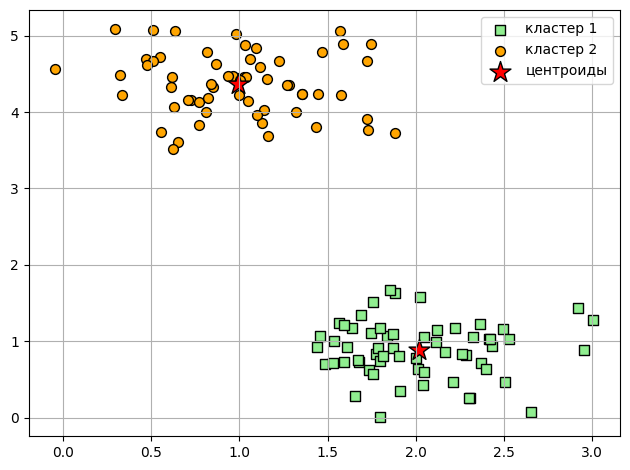

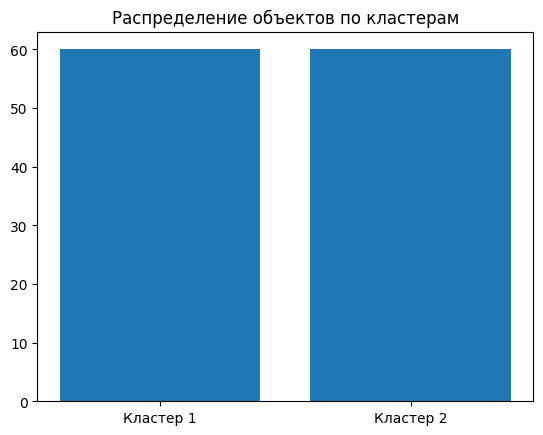

In [5]:
def k_means_comparasion(X):
    km = KMeans(n_clusters=2, algorithm='elkan', init='random', n_init=10, max_iter=800,
                    tol=1e-50, random_state=0)
    y_km = km.fit_predict(X)
    
    # отображаем точки кластера с индексом 0
    plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], 
                s=50, c='lightgreen', marker='s', edgecolor='black',
                label='кластер 1')
    # отображаем точки кластера с индексом 1
    plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
                s=50, c='orange', marker='o', edgecolor='black',
                label='кластер 2')
    # отображаем центры кластеров
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1],
                s = 250, marker='*', c = 'red', edgecolor='black',
                label = 'центроиды')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()

    cluster_indices, counts = np.unique(y_km, return_counts = True)
    cluster_names = ["Кластер {0}".format(idx + 1) for idx in cluster_indices]
    plt.title("Распределение объектов по кластерам")
    plt.bar(x = cluster_names, height = counts)
    plt.show()

k_means_comparasion(X_blobs)

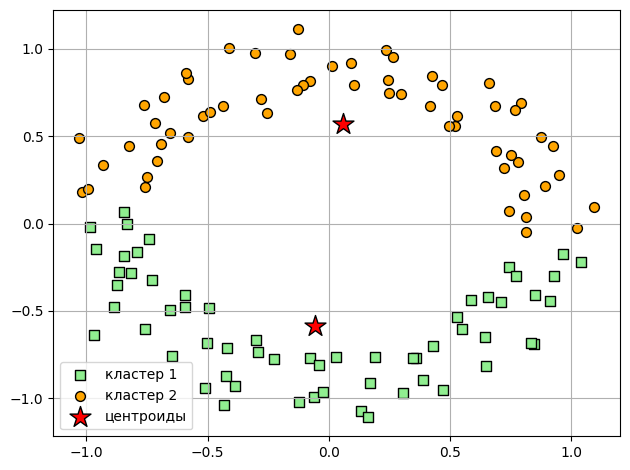

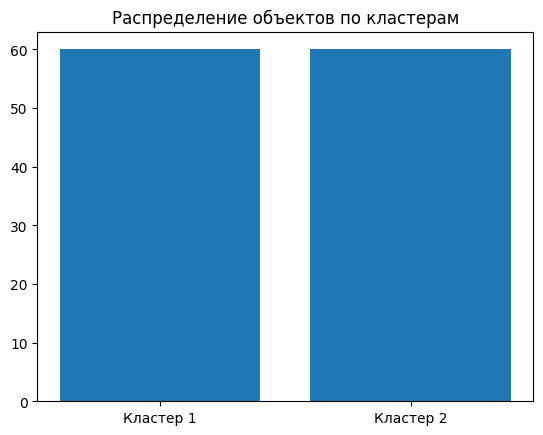

In [6]:
k_means_comparasion(X_circles)

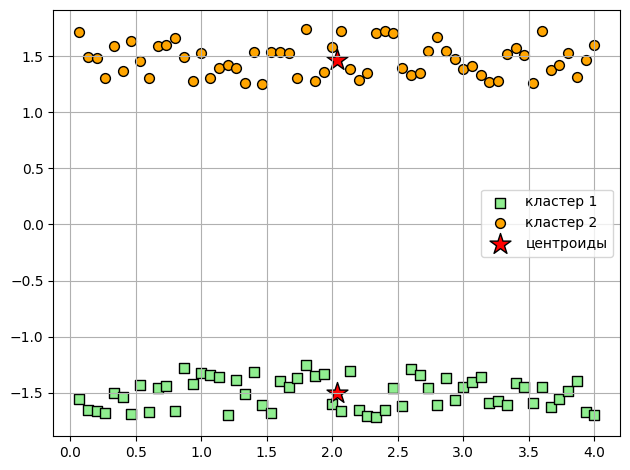

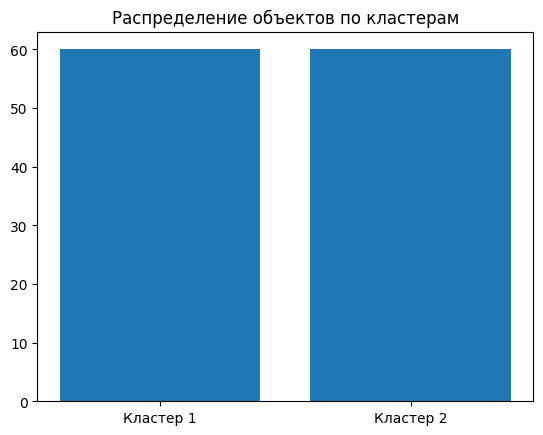

In [7]:
k_means_comparasion(X_lines)

<h3>Agglomerative clustering(complete linkage)</h3>

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


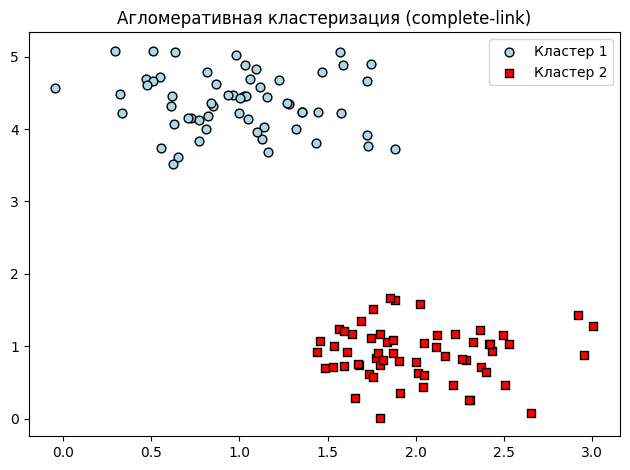

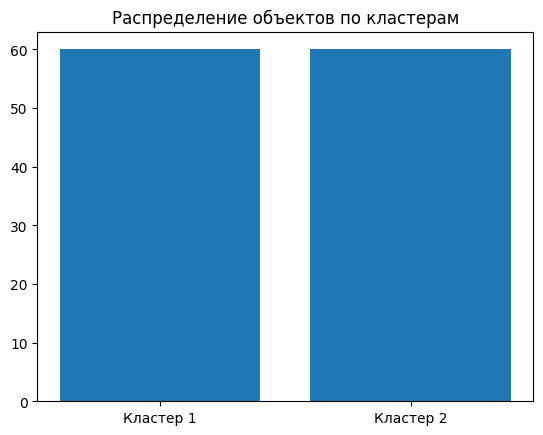

In [8]:
def agglomerative_clustrering(X, linkage):
    ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=linkage)
    y_ac = ac.fit_predict(X)
    plt.scatter(X[y_ac == 0, 0], X[y_ac == 0,  1], 
                c = 'lightblue', edgecolor = 'black', marker = 'o', s = 40,
                label = 'Кластер 1')
    plt.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], 
                c = 'red', edgecolor = 'black', marker = 's', s = 40,
                label = 'Кластер 2')
    plt.title(f"Агломеративная кластеризация ({linkage}-link)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    cluster_indices, counts = np.unique(y_ac, return_counts = True)
    cluster_names = ["Кластер {0}".format(idx + 1) for idx in cluster_indices]
    plt.title("Распределение объектов по кластерам")
    plt.bar(x = cluster_names, height = counts)
    plt.show()

agglomerative_clustrering(X_blobs, 'complete')

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


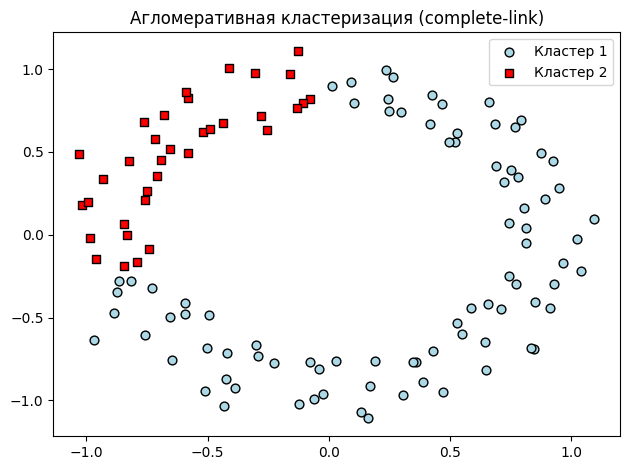

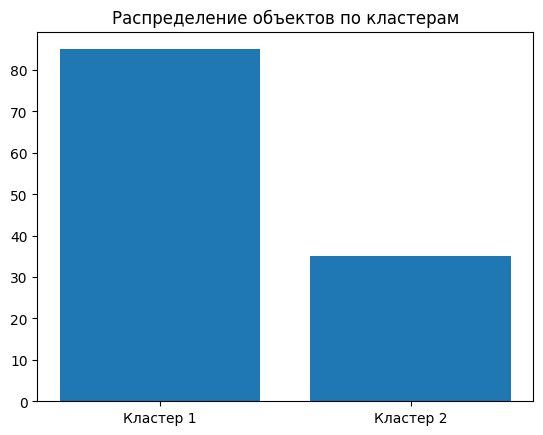

In [9]:
agglomerative_clustrering(X_circles, 'complete')

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


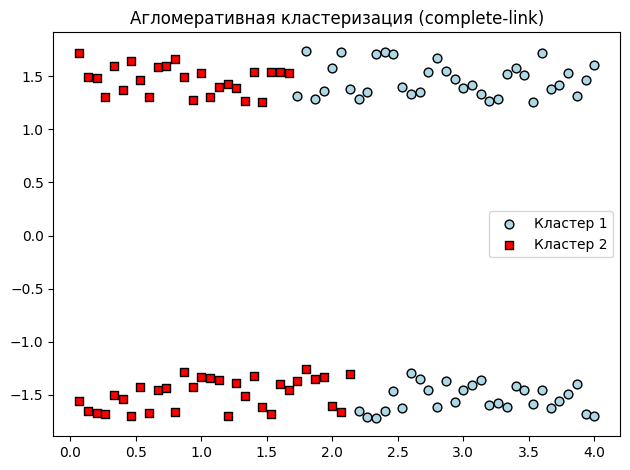

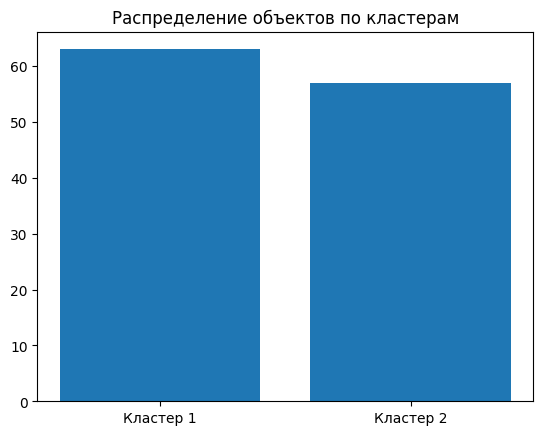

In [10]:
agglomerative_clustrering(X_lines, 'complete')

<h3>Algomerative clustering(single)</h3>

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


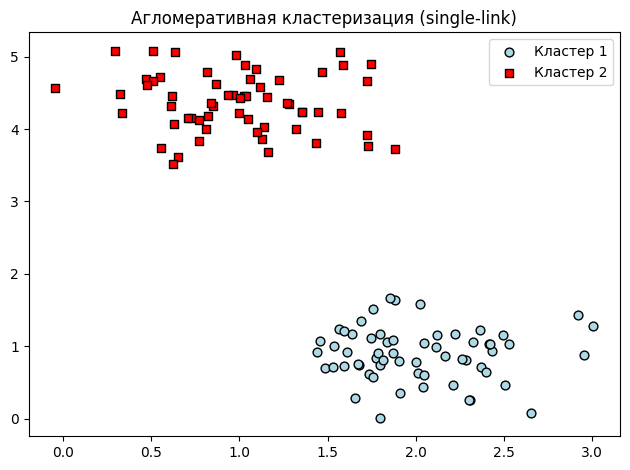

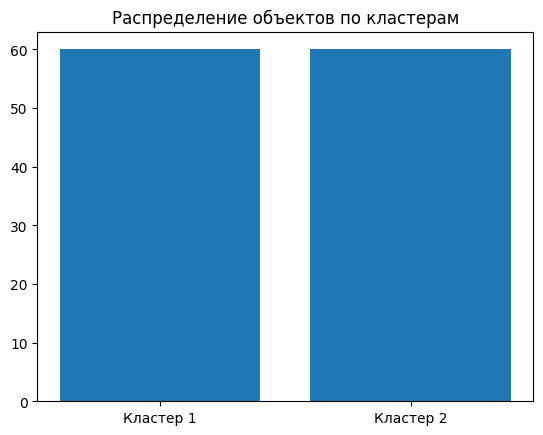

In [11]:
agglomerative_clustrering(X_blobs, 'single')

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


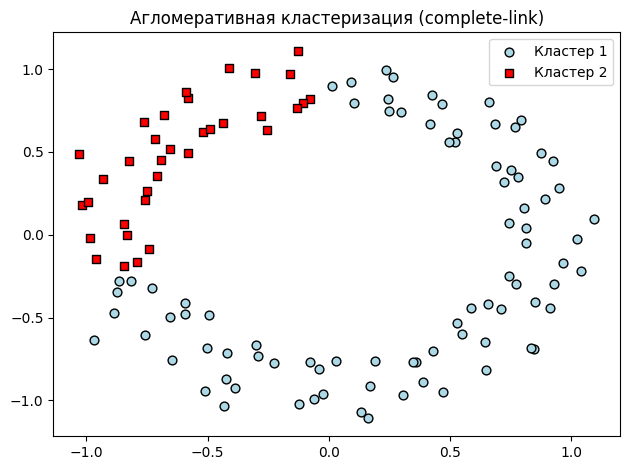

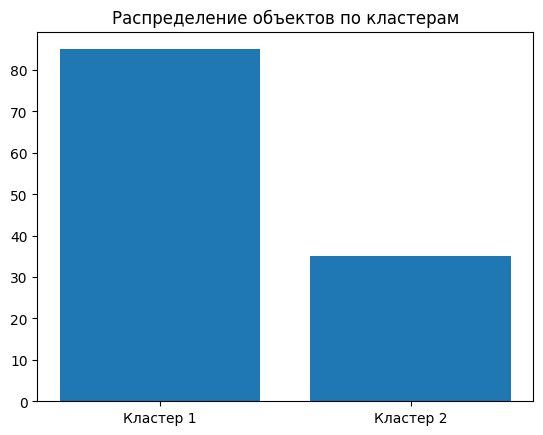

In [12]:
agglomerative_clustrering(X_circles, 'complete')

c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


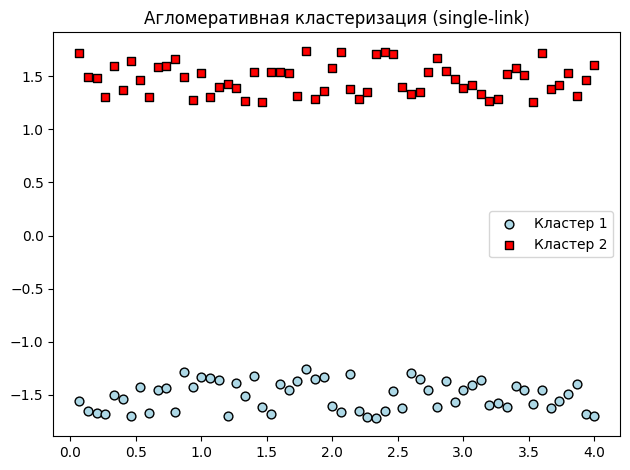

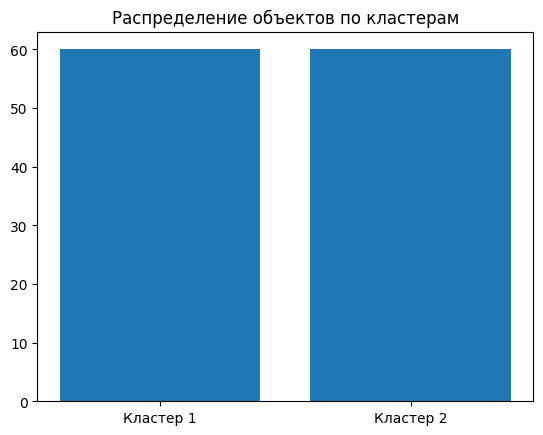

In [13]:
agglomerative_clustrering(X_lines, 'single')

<h1>3. Выбрать набор с многомерными данными для классификации</h1>

In [14]:
V = ord('Ф') % 7
display(Markdown(f"<h3>Вариант {V}<h3>"))

<h3>Вариант 3<h3>

In [15]:
df = pd.read_csv('eighthr.data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


<h4>CSV файл не обладает названиями показателей, но они собственно и не очень нужны, так как это специфические метеорологические показатели о величине влияния которых на класс (показатель 73), я вряд ли что-то мог бы сказать аналитически</h4>

In [16]:
df = df.replace('?', np.NaN).dropna(axis=0)
df.loc[:, 73].value_counts()

73
0.0    1719
1.0     128
Name: count, dtype: int64

<h1>4. Выполнить кластеризацию объектов без учёта признака класса</h1>

In [77]:
X = df.loc[:, 1:72]
Y = df.loc[:, 73]

ac = AgglomerativeClustering(linkage = 'complete')
y_ac = ac.fit_predict(X)
print(pd.Series(y_ac).value_counts())
print(Y.value_counts())

0    1823
1      24
Name: count, dtype: int64
73
0.0    1719
1.0     128
Name: count, dtype: int64


In [69]:
km = KMeans(algorithm="auto", n_clusters=2, tol=2**10)
y_km = km.fit_predict(X)
print(pd.Series(y_km).value_counts())
print(Y.value_counts())

0    1268
1     579
Name: count, dtype: int64
73
0.0    1719
1.0     128
Name: count, dtype: int64


c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\79270\Desktop\Zubr\enviroments\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


<h1>5. Оценить качество построенных кластеров с помощью оценки Silhoutte</h1>

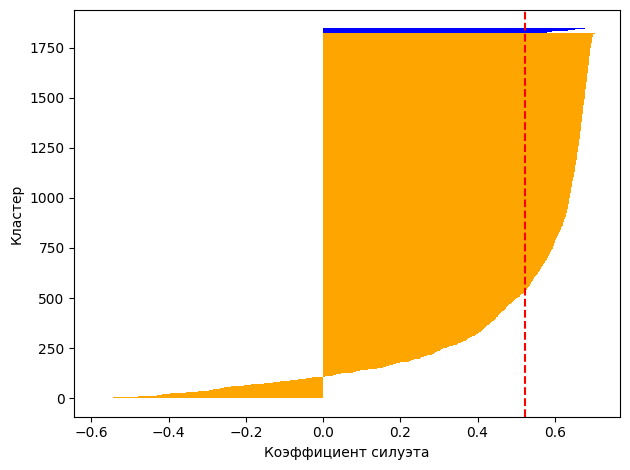

In [48]:
y_ac_lower, y_ac_upper = 0, 0
yticks = []
silhouette_values = silhouette_samples(X, y_ac, metric='euclidean')
for c in Y.unique():
    c_silhouette_values = silhouette_values[y_ac == c]
    c_silhouette_values.sort()
    y_ac_upper += len(c_silhouette_values)
    plt.barh(range(y_ac_lower, y_ac_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = 'orange' if c==0 else 'blue')
    y_ac_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

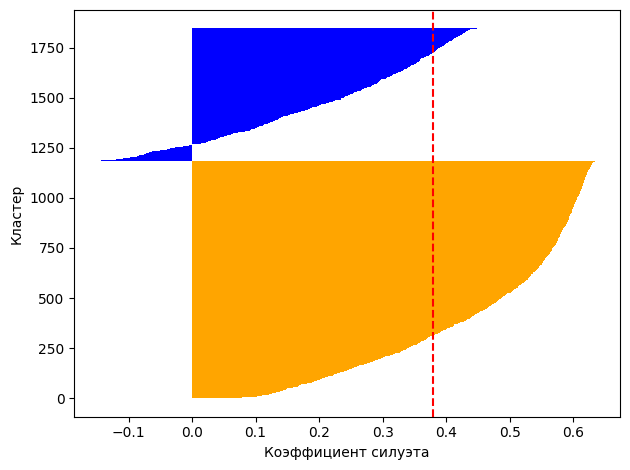

In [49]:
y_ac_lower, y_ac_upper = 0, 0
yticks = []
silhouette_values = silhouette_samples(X, y_km, metric='euclidean')
for c in Y.unique():
    c_silhouette_values = silhouette_values[y_km == c]
    c_silhouette_values.sort()
    y_ac_upper += len(c_silhouette_values)
    plt.barh(range(y_ac_lower, y_ac_upper), 
             c_silhouette_values, 
             height = 1.0, 
             edgecolor='none', color = 'orange' if c==0 else 'blue')
    y_ac_lower += len(c_silhouette_values)
# отображаем усредненный уровень silhoutte по всем объектам
silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

<h3>Для построенных кластеров оценить степень неоднородности с помощью метрики Rand</h3>

In [73]:
display(Markdown(f"<h4>Rand Index K-means: {adjusted_rand_score(Y, y_km)}</h4>"))
display(Markdown(f"<h4>Rand Index AgglomerativeClustering: {adjusted_rand_score(Y, y_ac)}</h4>"))


<h4>Rand Index K-means: -0.03711792197210621</h4>

<h4>Rand Index AgglomerativeClustering: -0.020396571259500493</h4>

<h3>Построить диаграмму частот по кластерам с группировкой по классам</h3>

Text(0.5, 1.0, 'Agglomerative Clusters')

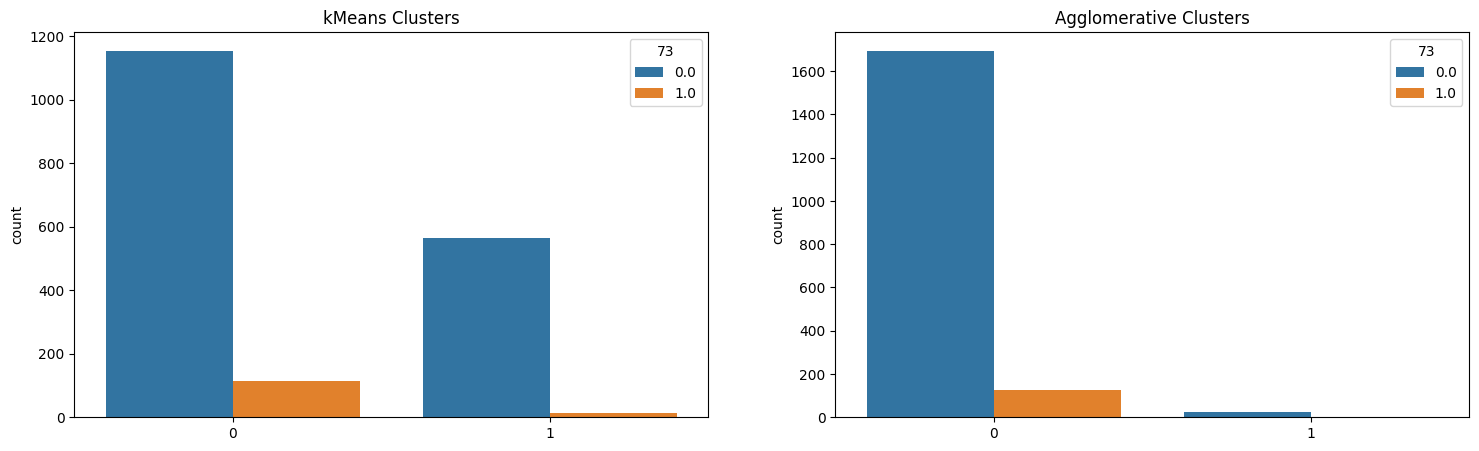

In [74]:

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

seaborn.countplot(x=y_km, hue=Y, ax=ax[0])
ax[0].set_title('kMeans Clusters')

seaborn.countplot(x=y_ac, hue=Y, ax=ax[1])
ax[1].set_title('Agglomerative Clusters')